In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
%matplotlib inline
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

In [68]:
os.getcwd()

'E:\\Complete Machine Learning\\datasets\\Backorder'

In [69]:
os.chdir('E:\Complete Machine Learning\datasets\Backorder')

In [86]:
train=pd.read_csv('Training.csv',index_col='sku')
test=pd.read_csv('Test.csv',index_col='sku')

In [10]:
train.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [11]:
test.head(5)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,,
3285085,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3285131,9.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,-99.00,-99.00,0.0,No,No,Yes,No,No,No
3285358,17.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.92,0.95,0.0,No,No,No,Yes,No,No
3285517,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,No,0.0,0.78,0.75,0.0,No,No,Yes,Yes,No,No
3285608,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.54,0.71,0.0,No,No,No,Yes,No,No


In [12]:
round(train.describe(),2)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1687860.00,1586967.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00,1687860.00
mean,496.11,7.87,44.05,178.12,344.99,506.36,55.93,175.03,341.73,525.27,52.77,2.04,-6.87,-6.44,0.63
std,29615.23,7.06,1342.74,5026.55,9795.15,14378.92,1928.20,5192.38,9613.17,14838.61,1254.98,236.02,26.56,25.84,33.72
min,-27256.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-99.00,-99.00,0.00
25%,4.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.66,0.00
50%,15.00,8.00,0.00,0.00,0.00,0.00,0.00,1.00,2.00,4.00,0.00,0.00,0.82,0.81,0.00
75%,80.00,9.00,0.00,4.00,12.00,20.00,4.00,15.00,31.00,47.00,3.00,0.00,0.97,0.95,0.00
max,12334404.00,52.00,489408.00,1427612.00,2461360.00,3777304.00,741774.00,1105478.00,2146625.00,3205172.00,313319.00,146496.00,1.00,1.00,12530.00


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687861 entries, 1026827 to (1687860 rows)
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  object 
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       16878

In [87]:
df=train.copy()

In [15]:
tf=test.copy()

In [88]:
#3 Replacing -99.00 with NaN value in perf_6_month_avg and perf_12_month_avg
df['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
df['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

In [17]:
print('Missing % of lead_time is {} %'.format(round(df['lead_time'].isnull().sum()/len(df['lead_time'])*100),2))
print('Missing % of perf_6_month_avg is {} %'.format(round(df['perf_6_month_avg'].isnull().sum()/len(df['perf_6_month_avg'])*100)))
print('Missing % of perf_12_month_avg is {} %'.format(round(df['perf_12_month_avg'].isnull().sum()/len(df['perf_12_month_avg'])*100)))

Missing % of lead_time is 6 %
Missing % of perf_6_month_avg is 8 %
Missing % of perf_12_month_avg is 7 %


In [18]:
tf['perf_6_month_avg'].replace(-99.00,np.nan,inplace=True)
tf['perf_12_month_avg'].replace(-99.00,np.nan,inplace=True)

In [89]:
num_feat=df.select_dtypes(include='number').columns.to_list()
cat_feat=df.select_dtypes(include='object').columns.to_list()

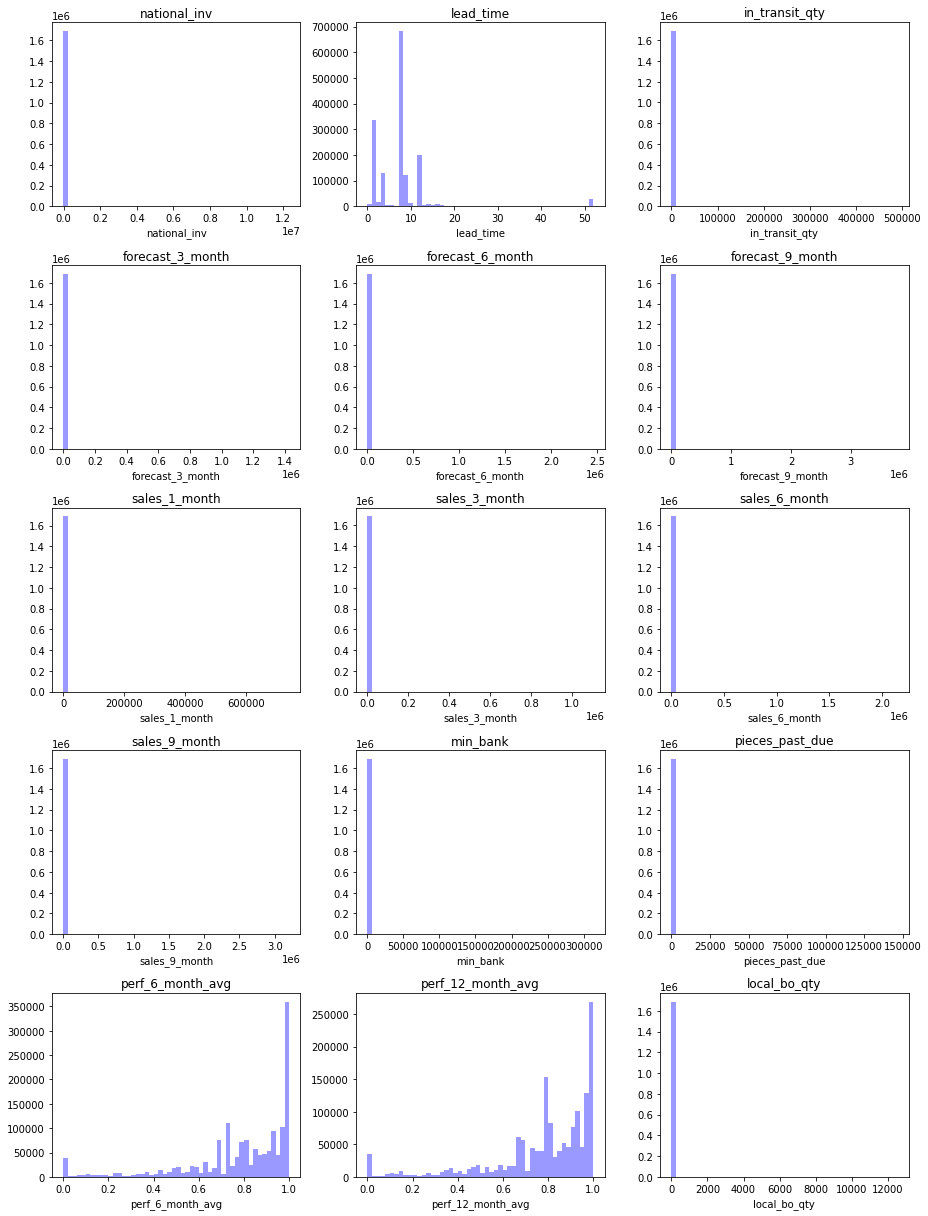

In [20]:
plt.figure(figsize=(13,17))
for i,feat in enumerate(num_feat):
    plt.subplot(5,3,i+1)
    sns.distplot(df[feat],kde=False,color='blue')
    plt.tight_layout()
    plt.title(feat)

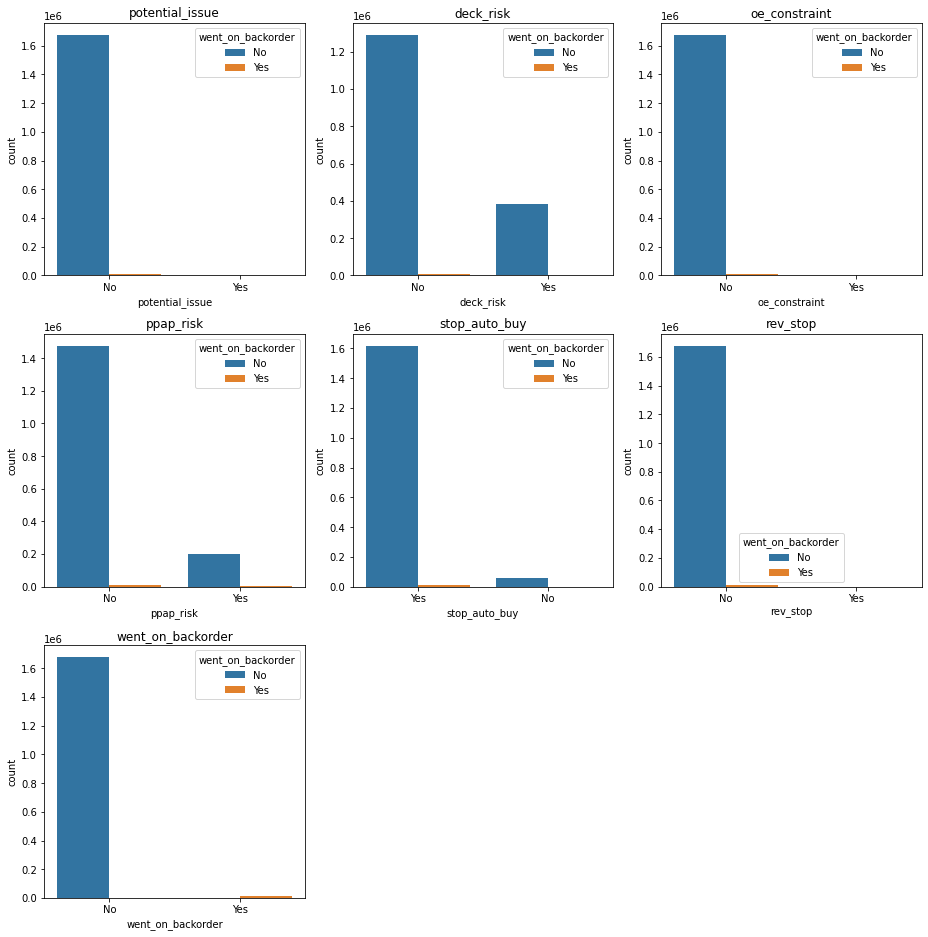

In [21]:
plt.figure(figsize=(13,17))
for i,feat in enumerate(cat_feat):
    plt.subplot(4,3,i+1)
    sns.countplot(x=feat,data=df,hue='went_on_backorder')
    plt.tight_layout()
    plt.title(feat)

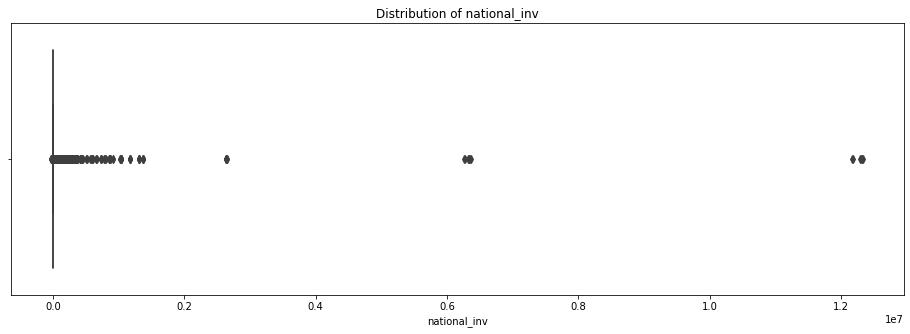

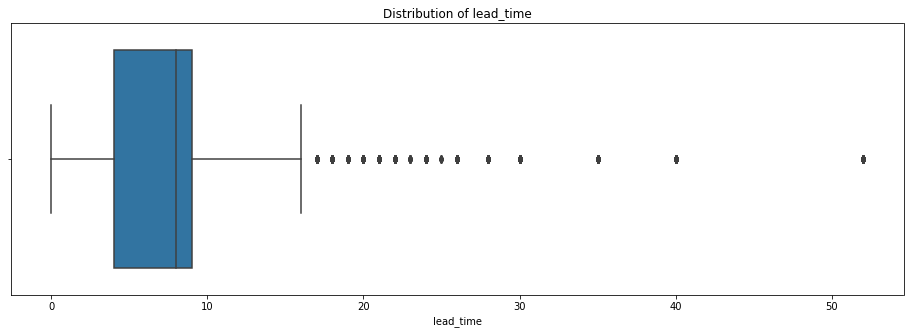

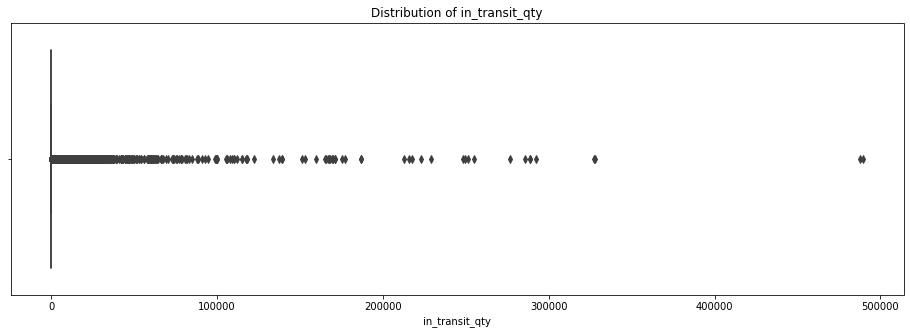

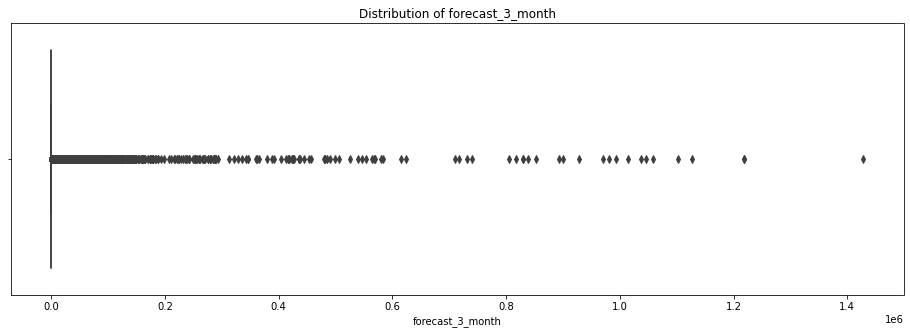

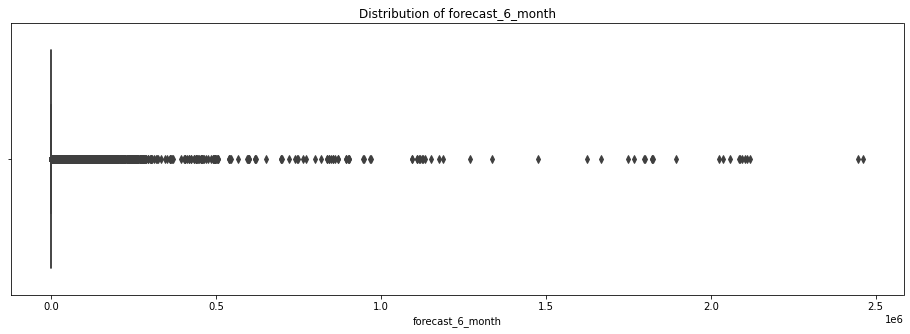

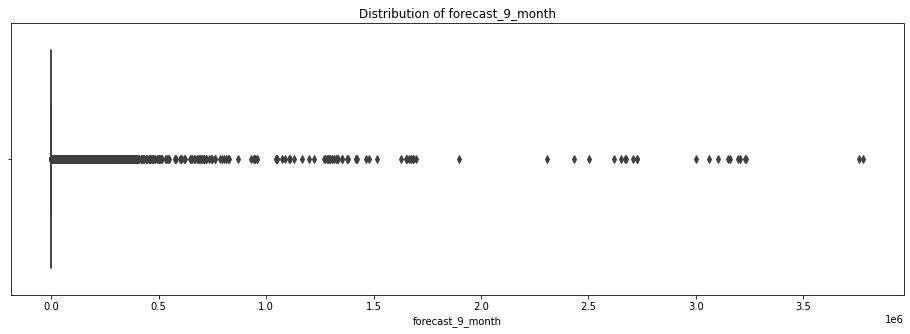

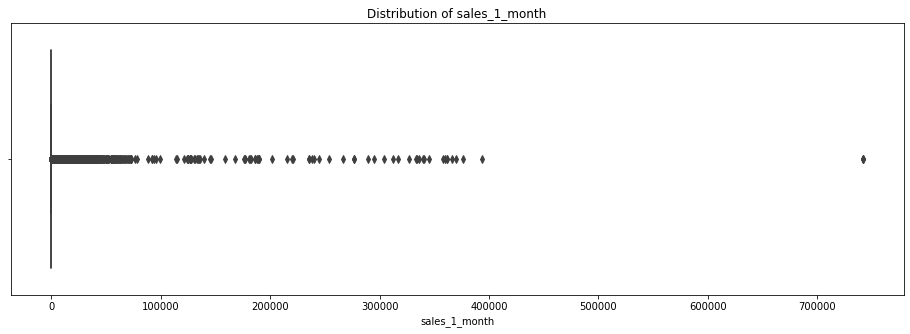

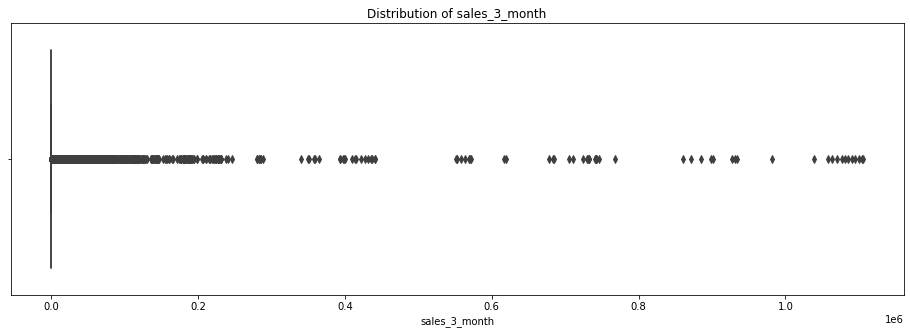

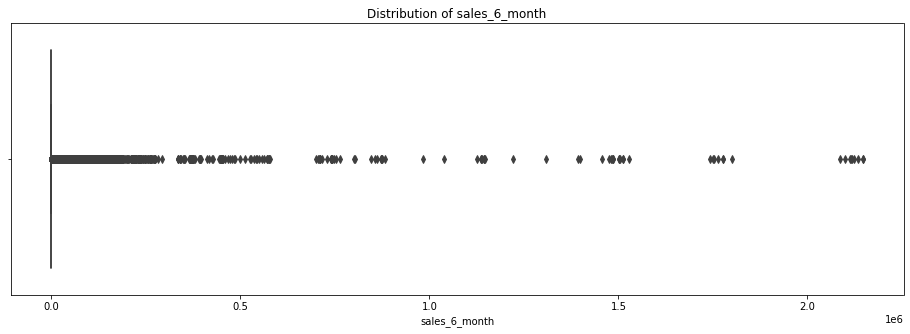

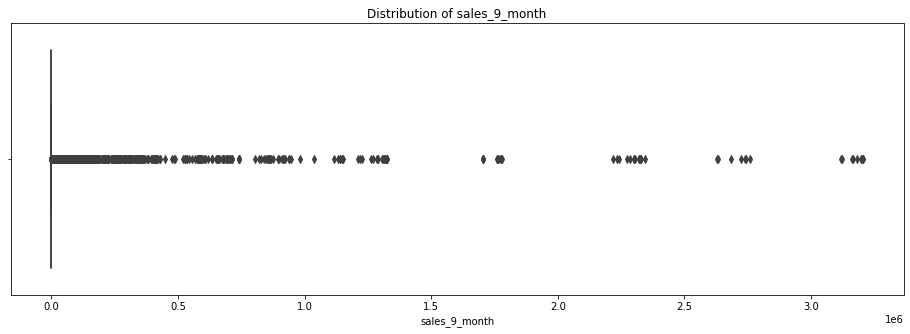

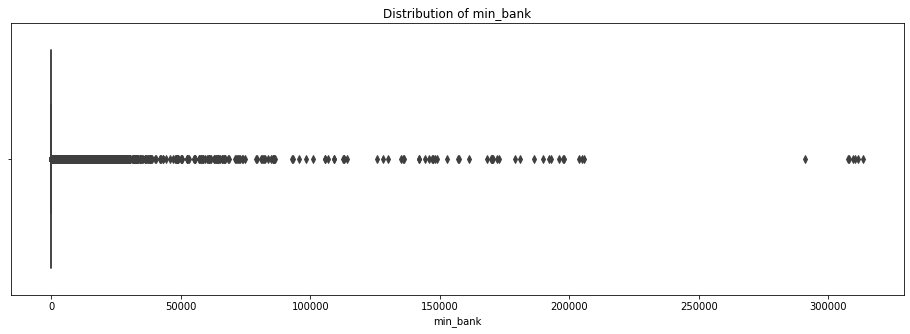

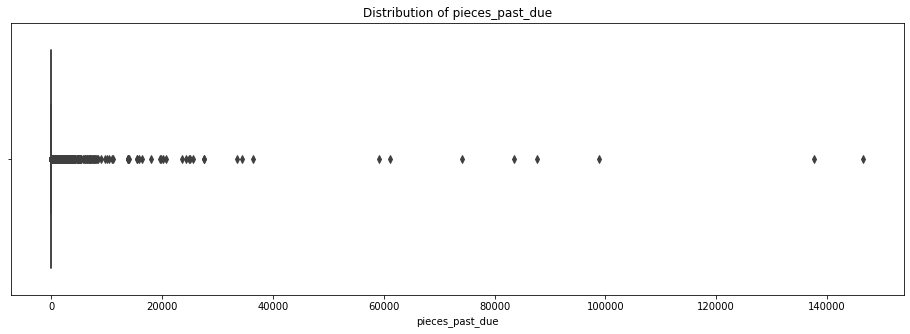

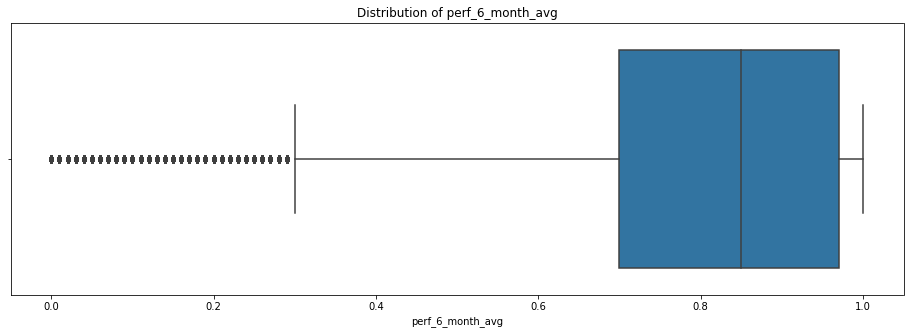

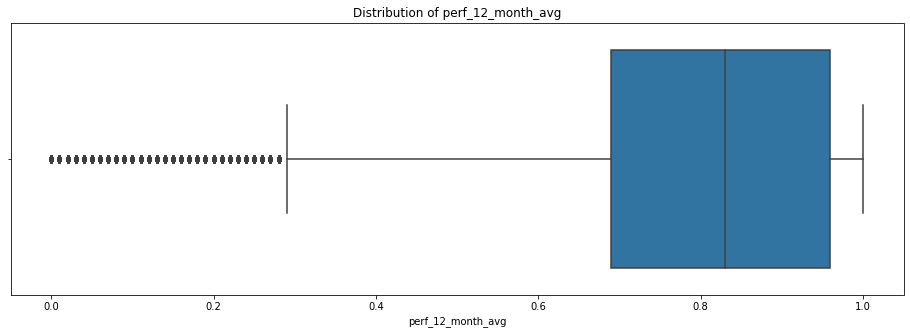

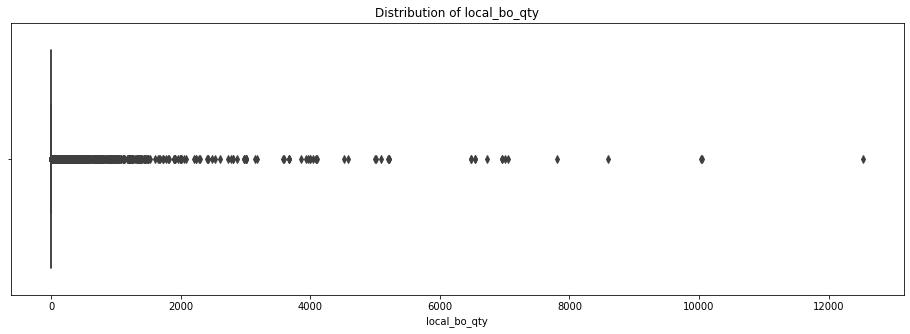

In [22]:
for feat in num_feat:
    plt.figure(figsize=(16,5))
    sns.boxplot(df[feat])
    plt.title('Distribution of {}'.format(feat))
    plt.show()

In [90]:
df['lead_time']=df['lead_time'].fillna(df['lead_time'].median())
df['perf_6_month_avg']=df['perf_6_month_avg'].fillna(df['perf_6_month_avg'].median())
df['perf_12_month_avg']=df['perf_12_month_avg'].fillna(df['perf_12_month_avg'].median())

In [24]:
tf['lead_time']=tf['lead_time'].fillna(tf['lead_time'].median())
tf['perf_6_month_avg']=tf['perf_6_month_avg'].fillna(tf['perf_6_month_avg'].median())
tf['perf_12_month_avg']=tf['perf_12_month_avg'].fillna(tf['perf_12_month_avg'].median())

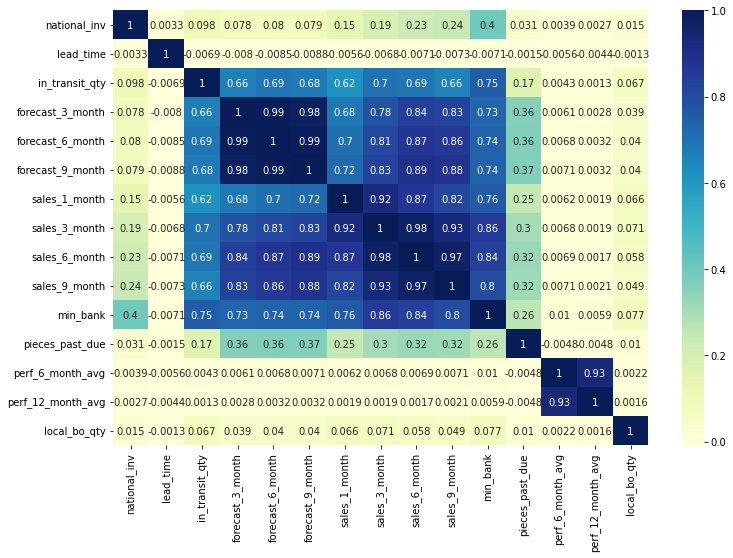

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [26]:
df1=df[:500000]

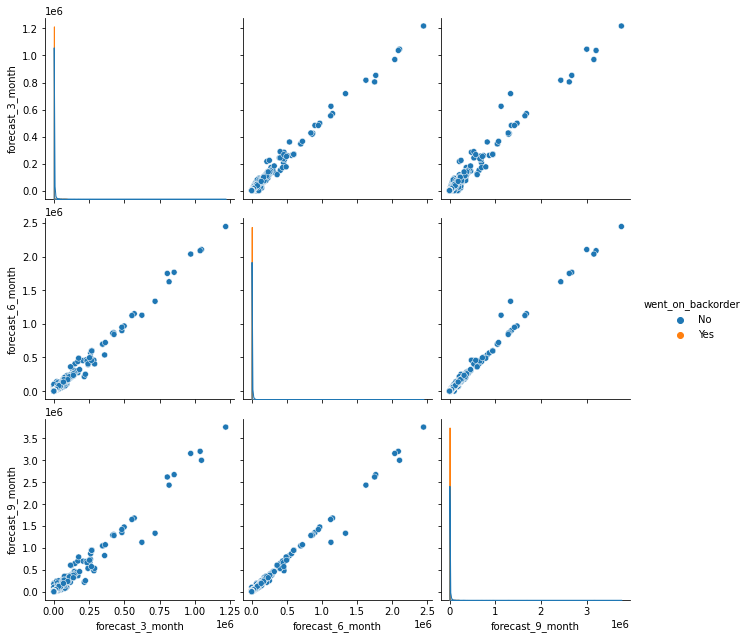

In [27]:
forecasts=['forecast_3_month','forecast_6_month','forecast_9_month']
sns.pairplot(df1,vars=forecasts,hue='went_on_backorder',size=3)
plt.show()

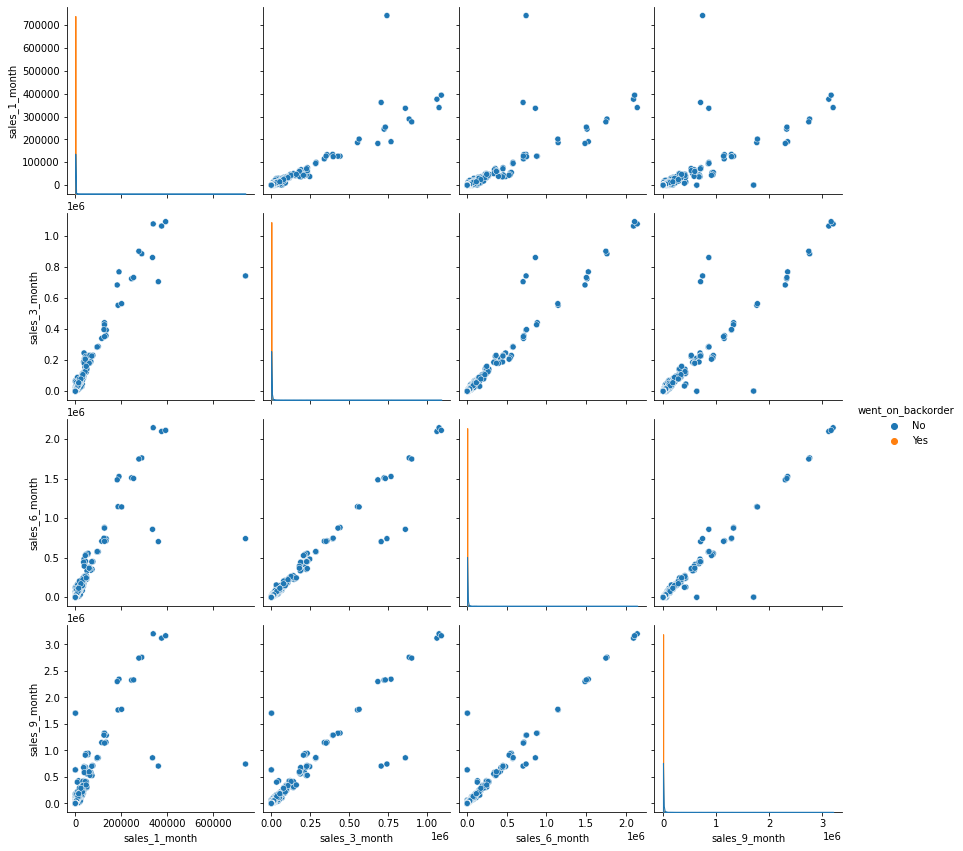

In [28]:
sales=['sales_1_month','sales_3_month','sales_6_month','sales_9_month']
sns.pairplot(df1,vars=sales,hue='went_on_backorder',size=3)
plt.show()

In [29]:
no_bo=df1[df1['went_on_backorder']=='No']
is_bo=df1[df1['went_on_backorder']=='Yes']

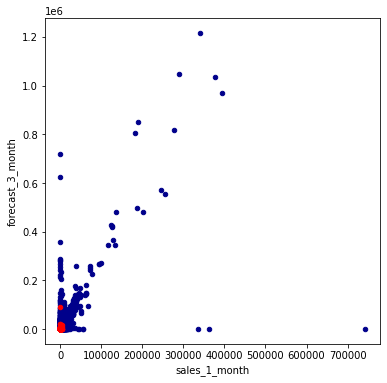

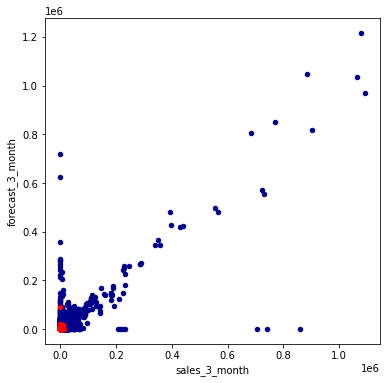

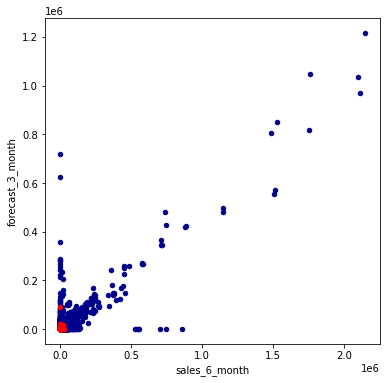

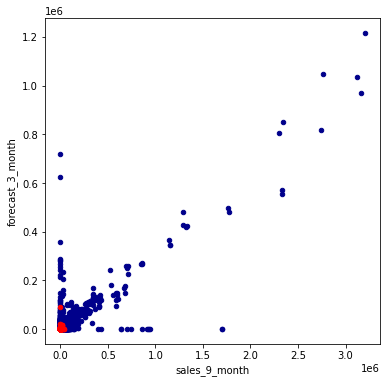

In [30]:
for col in sales:
    fig=plt.figure(figsize=(6,6))
    ax=fig.gca()
    no_bo.plot(kind='scatter',x=col,y='forecast_3_month',ax=ax,color='DarkBlue',legend=True)
    is_bo.plot(kind='scatter',x=col,y='forecast_3_month',ax=ax,color='Red',legend=True)

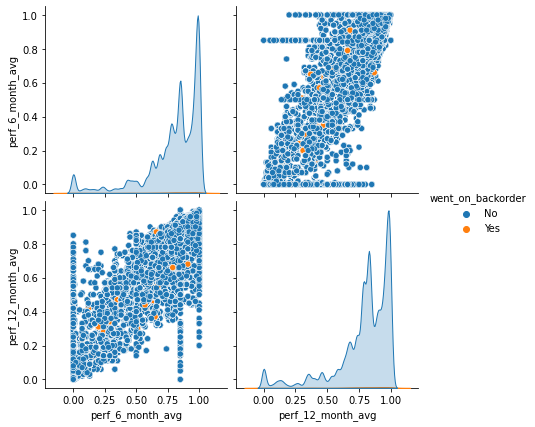

In [31]:
perf=['perf_6_month_avg','perf_12_month_avg']
sns.pairplot(df1,vars=perf,hue='went_on_backorder',size=3)
plt.show()

<AxesSubplot:xlabel='perf_6_month_avg', ylabel='perf_12_month_avg'>

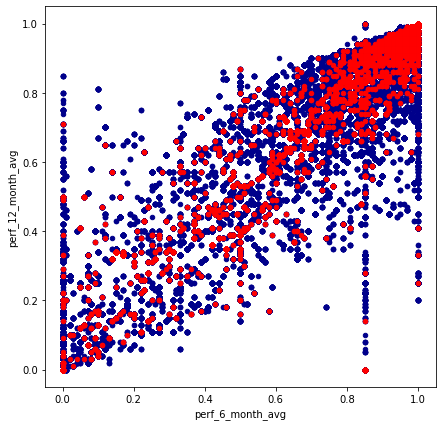

In [32]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca()
no_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='DarkBlue')
is_bo.plot(kind='scatter', x='perf_6_month_avg', y='perf_12_month_avg', ax=ax, color='Red')

In [91]:
df['forecast']=(df['forecast_3_month']+ df['forecast_6_month']+df['forecast_9_month'])/3

In [34]:
tf['forecast']=(tf['forecast_3_month']+ tf['forecast_6_month']+tf['forecast_9_month'])/3

In [92]:
df.drop(['forecast_3_month','forecast_6_month','forecast_9_month'],axis=1,inplace=True)

In [36]:
tf.drop(['forecast_3_month','forecast_6_month','forecast_9_month'],axis=1,inplace=True)

In [93]:
df=df[:-1]
tf=tf[:-1]

In [94]:
df['sales']=(df['sales_1_month']+df['sales_3_month']+df['sales_6_month']+df['sales_9_month'])/4

In [39]:
tf['sales']=(tf['sales_1_month']+tf['sales_3_month']+tf['sales_6_month']+tf['sales_9_month'])/4

In [95]:
df.drop(['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],axis=1,inplace=True)

In [41]:
tf.drop(['sales_1_month','sales_3_month','sales_6_month','sales_9_month'],axis=1,inplace=True)

In [96]:
df['perf']=(df['perf_6_month_avg']+df['perf_12_month_avg'])/2

In [43]:
tf['perf']=(tf['perf_6_month_avg']+tf['perf_12_month_avg'])/2

In [97]:
df.drop(['perf_6_month_avg','perf_12_month_avg'],axis=1,inplace=True)

In [45]:
tf.drop(['perf_6_month_avg','perf_12_month_avg'],axis=1,inplace=True)

In [98]:
for feat in cat_feat:
    df[feat]=df[feat].map({
    'Yes':1,
    'No':0
})

In [99]:
nf=df.copy()

In [47]:
for feat in cat_feat:
    tf[feat]=tf[feat].map({
    'Yes':1,
    'No':0
})

In [100]:
skewed_list=['national_inv','in_transit_qty','min_bank','pieces_past_due','local_bo_qty','forecast','sales']
log_list=[]
for item in skewed_list:
    log_list.append(df.columns.get_loc(item))

In [66]:
log_list

[0, 2, 3, 5, 6, 13, 14]

In [101]:
def log_transform(a):
    sign =np.sign(a[log_list])
    a[log_list]=np.log(1.0+abs(a[log_list]))*sign
    return a

In [102]:
df_log=np.apply_along_axis(log_transform,1,df)

In [103]:
df_log=pd.DataFrame(df_log,columns=nf.columns)

In [104]:
df_log.to_csv('df_log.csv',index=False)

In [105]:
df_log.head(5)

,national_inv,lead_time,in_transit_qty,min_bank,potential_issue,pieces_past_due,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder,forecast,sales,perf
0,0.000000,8.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.840
1,1.098612,9.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.990
2,1.098612,8.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.840
3,2.079442,8.0,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.115
4,2.197225,8.0,0.0,1.098612,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.693147,0.840


In [51]:
tf_log=np.apply_along_axis(log_transform,1,tf)

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(df_log)

In [53]:
df_log=sc.transform(df_log)

In [54]:
tf_log=sc.transform(tf_log)

In [55]:
df_log=pd.DataFrame(df_log,columns=df.columns)

In [56]:
tf_log=pd.DataFrame(tf_log,columns=tf.columns)

In [57]:
X_train=df_log.drop('went_on_backorder',axis=1)
y_train=df['went_on_backorder']

In [58]:
X_test=tf_log.drop('went_on_backorder',axis=1)
y_test=tf['went_on_backorder']

In [59]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import classification_report,plot_confusion_matrix,f1_score,recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [61]:
over=SMOTE(sampling_strategy=0.2)
X_train_over,y_train_over=over.fit_resample(X_train,y_train)

In [63]:
under=RandomUnderSampler(sampling_strategy=0.5)
X_train_sampled,y_train_sampled=under.fit_resample(X_train_over,y_train_over)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92    239387
           1       0.06      0.83      0.12      2688

    accuracy                           0.86    242075
   macro avg       0.53      0.85      0.52    242075
weighted avg       0.99      0.86      0.92    242075



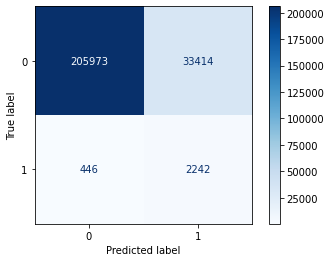

In [64]:
model= EasyEnsembleClassifier(n_estimators=10)
model.fit(X_train_sampled,y_train_sampled)
predictions=model.predict(X_test)
print(classification_report(y_test,predictions))
disp=plot_confusion_matrix(model,X_test,y_test,display_labels=[0,1],
                          cmap=plt.cm.Blues,values_format='.0f')
plt.show()

In [65]:
import pickle
file=open('easy_ensemble_model.pkl','wb')
pickle.dump(model,file)